In [6]:
import numpy as np

# Predicting credit default
This dataset includes 30000 observations and whether or not they defaulted on their credit card. Observations include data such as credit limit, age, sex, highest education reached, and marital status. The dataset was obtained from the Tests section of Yellowbrick.

In [8]:
import numpy.matlib

In [5]:
from sklearn.svm import LinearSVC
from tests.dataset import DatasetMixin
import matplotlib
matplotlib.use('Gtk3Agg')

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [1]:
from yellowbrick.classifier import ROCAUC

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def add_column(data_array,new_column):
    nc = np.reshape(new_column,(-1,1))
    if data_array is None:
        return nc
    else:
        return np.concatenate((data_array,nc),axis=1)

In [3]:
def add_categorical(data_array,new_column,datatype):
    nc = np.reshape(new_column,(-1,1))
    unq = np.unique(new_column)
    nrows = np.size(new_column)
    new_columns = None

    for y in unq:
        newcol = np.zeros((nrows,1),dtype=datatype)
        newcol[np.where(nc==y)] = 1
        if new_columns is None:
            new_columns = newcol
        else:
            new_columns = np.concatenate((new_columns,newcol),axis=1)

    if data_array is None:
        return new_columns
    else:
        return np.concatenate((data_array,new_columns),axis=1)

In [7]:
datasets = DatasetMixin()
credit = datasets.load_data('credit')
credit_keys = credit.dtype.names
datatype = credit.dtype[0]
ncols = len(credit_keys)
categorical_names = ['edu','married']
y_name = 'default'
credit_data = None
for j in range(0,ncols):
    if credit_keys[j] in categorical_names:
        credit_data = add_categorical(credit_data,credit[credit_keys[j]],datatype)
    elif credit_keys[j] == y_name:
        y = credit[y_name].astype(int)
    else:
        credit_data = add_column(credit_data,credit[credit_keys[j]])

In [9]:
datashape = credit_data.shape
nrows = datashape[0]

In [10]:
print(str(nrows))

30000


In [11]:
cmeans = np.mean(credit_data,0)
repmeans = numpy.matlib.repmat(cmeans,nrows,1)
mydata = credit_data - repmeans
sstds = np.std(mydata,0)
repstds = numpy.matlib.repmat(sstds,nrows,1)
mydata = np.divide(mydata,repstds)

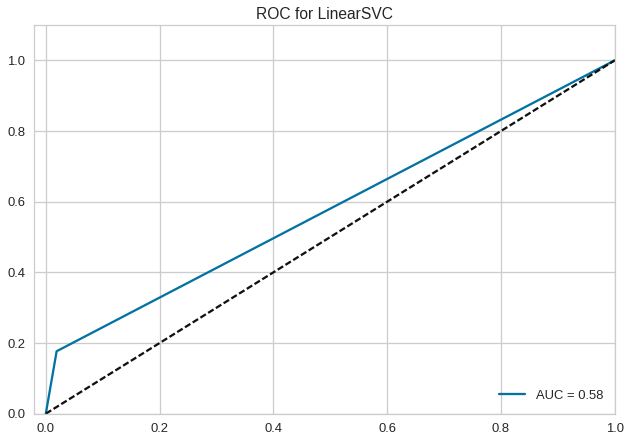

In [12]:
visualizer = ROCAUC(LinearSVC())
visualizer.fit(mydata,y)
visualizer.score(mydata,y)
visualizer.poof()